<a href="https://colab.research.google.com/github/hoanglhl2003/Crowd-counting-via-Multifaceted-Attention/blob/main/B%E1%BA%A3n_sao_c%E1%BB%A7a_Colaboratory_ch%C3%A0o_m%E1%BB%ABng_b%E1%BA%A1n!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Access to drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Boosting-Crowd-Counting-via-Multifaceted-Attention-main/Boosting-Crowd-Counting-via-Multifaceted-Attention-main

/content/drive/MyDrive/Boosting-Crowd-Counting-via-Multifaceted-Attention-main/Boosting-Crowd-Counting-via-Multifaceted-Attention-main


# Add libraries

In [ ]:
import torch
import math
import os
import numpy as np
from models.vgg_c import vgg19_trans
from glob import glob
from torchvision import transforms
from PIL import Image
import cv2
from shutil import copy
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from scipy.io import loadmat

# Check cuda and get model and image for testing

In [ ]:
model_path ='/content/drive/MyDrive/Boosting-Crowd-Counting-via-Multifaceted-Attention-main/Boosting-Crowd-Counting-via-Multifaceted-Attention-main/model_ucf/UCF.pth'
device = '0'
img_path = '/content/drive/MyDrive/Boosting-Crowd-Counting-via-Multifaceted-Attention-main/Boosting-Crowd-Counting-via-Multifaceted-Attention-main/test_image/3A0A9378.JPG'

In [ ]:
os.environ['CUDA_VISIBLE_DEVICES'] = device.strip()  # set vis gpu
torch.backends.cudnn.benchmark = False

trans = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                          [0.229, 0.224, 0.225])
])

device = torch.device('cuda')
model = vgg19_trans()
model.to(device)
model.load_state_dict(torch.load(model_path, device))

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:04<00:00, 135MB/s]


<All keys matched successfully>

In [ ]:
img = Image.open(img_path).convert('RGB')
img_np = np.array(img)
h, w = img_np.shape[:2]
img = Image.fromarray(img_np)
img = trans(img).unsqueeze_(0)
inputs = img.to(device)

# Show result with count variable and image

/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:4140: UserWarning: nn.functional.upsample_bilinear is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample_bilinear is deprecated. Use nn.functional.interpolate instead.")



Count: 28



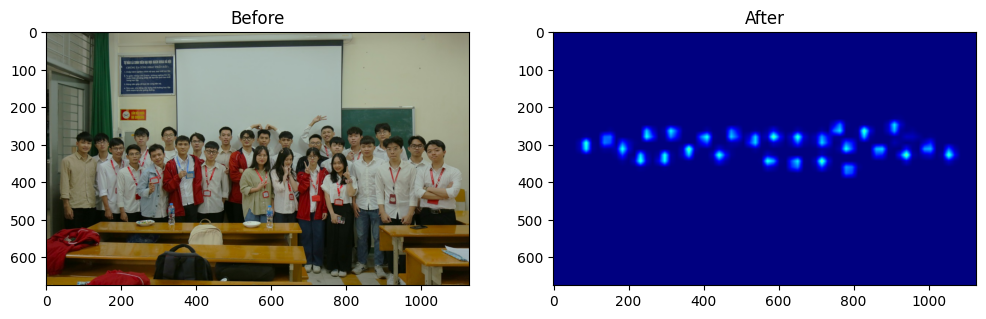

In [ ]:
assert inputs.size(0) == 1, 'the batch size should equal to 1'
with torch.set_grad_enabled(False):
    outputs = model(inputs)[0]

    print('\nCount: ' + str(math.ceil(torch.sum(outputs).item())) + '\n')


    outputs = outputs.detach().cpu().numpy()[0][0]
    outputs = cv2.resize(outputs, (w, h)) / 1.0
    outputs = np.clip(outputs, 0.0, 1.0) * 255
    outputs = outputs.astype(np.uint8)
    outputs = cv2.applyColorMap(outputs, cv2.COLORMAP_JET)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    img_before = mpimg.imread(img_path)
    plt.imshow(img_before)
    plt.title('Before')

    plt.subplot(1, 2, 2)
    img_after = cv2.cvtColor(outputs, cv2.COLOR_BGR2RGB)
    plt.imshow(img_after)
    plt.title('After')

    plt.show()


In [ ]:
!python /content/drive/MyDrive/Boosting-Crowd-Counting-via-Multifaceted-Attention-main/Boosting-Crowd-Counting-via-Multifaceted-Attention-main/test.py

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
mae nan, mse nan


In [ ]:
!python /content/drive/MyDrive/Boosting-Crowd-Counting-via-Multifaceted-Attention-main/Boosting-Crowd-Counting-via-Multifaceted-Attention-main/test.py

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
mae nan, mse nan
